In [ ]:
'''
# Using pip
$ pip install plotnine         # 1. should be sufficient for most
$ pip install 'plotnine[all]'  # 2. includes extra/optional packages
'''

In [2]:
from plotnine import *
from plotnine.data import mtcars

In [3]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<table class="align-default table" border="0">
<colgroup>
<col style="width: 13%">
<col style="width: 87%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Column</p></th>
<th class="head"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>mpg</p></td>
<td><p>Miles/(US) gallon</p></td>
</tr>
<tr class="row-odd"><td><p>cyl</p></td>
<td><p>Number of cylinders</p></td>
</tr>
<tr class="row-even"><td><p>disp</p></td>
<td><p>Displacement (cu.in.)</p></td>
</tr>
<tr class="row-odd"><td><p>hp</p></td>
<td><p>Gross horsepower</p></td>
</tr>
<tr class="row-even"><td><p>drat</p></td>
<td><p>Rear axle ratio</p></td>
</tr>
<tr class="row-odd"><td><p>wt</p></td>
<td><p>Weight (1000 lbs)</p></td>
</tr>
<tr class="row-even"><td><p>qsec</p></td>
<td><p>1/4 mile time</p></td>
</tr>
<tr class="row-odd"><td><p>vs</p></td>
<td><p>V/S</p></td>
</tr>
<tr class="row-even"><td><p>am</p></td>
<td><p>Transmission (0 = automatic, 1 = manual)</p></td>
</tr>
<tr class="row-odd"><td><p>gear</p></td>
<td><p>Number of forward gears</p></td>
</tr>
<tr class="row-even"><td><p>carb</p></td>
<td><p>Number of carburetors</p></td>
</tr>
</tbody>
</table>

In [8]:
import plotnine as plotnine
plotnine.options.figure_size = (7.4, 5.8)

# Scatter plot
- Two visual variables

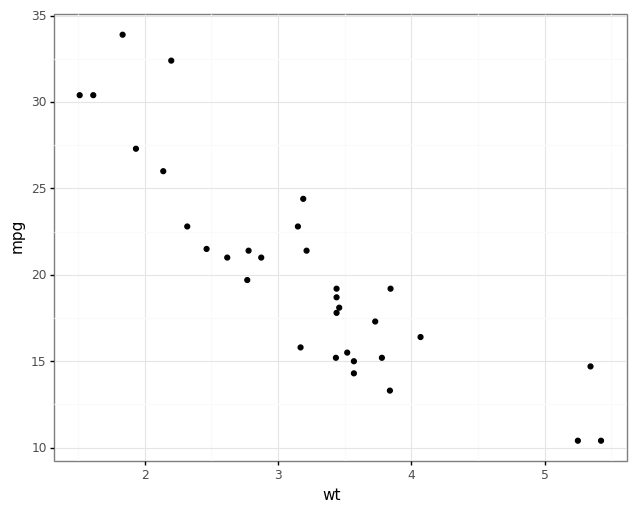

<ggplot: (8757626379497)>

In [9]:
(ggplot(mtcars, aes('wt', 'mpg'))
 + geom_point() + theme_bw())

# Three visual variables
## Scatter plot colored according some variable

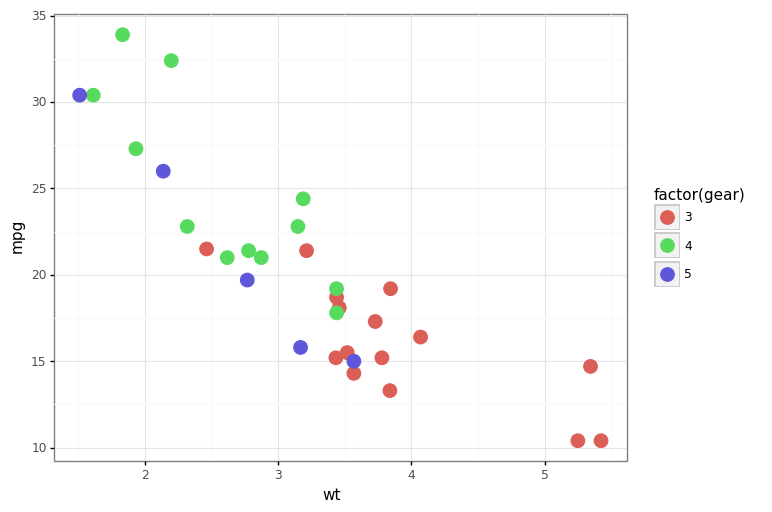

<ggplot: (8757622271801)>

In [16]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point(size=5) + theme_bw())

# Visualizing 4 visual variables

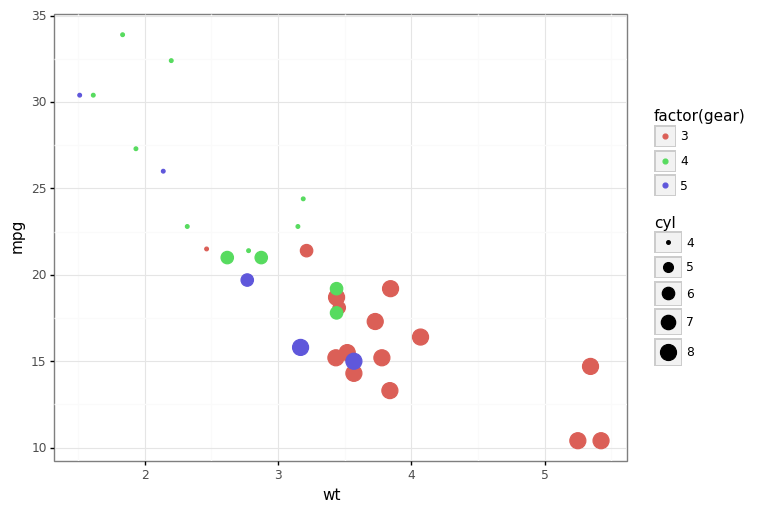

<ggplot: (8757622243757)>

In [15]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)', size='cyl'))
 + geom_point() + theme_bw())

# 4 variables alternative

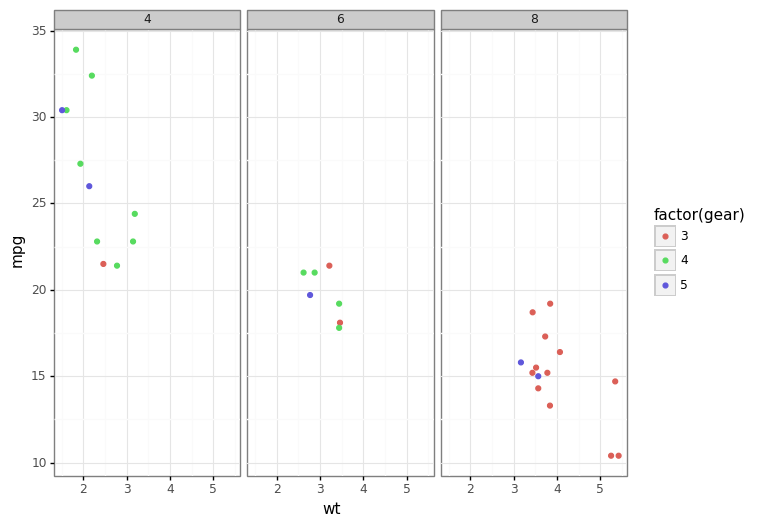

<ggplot: (8757622407025)>

In [18]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + facet_wrap('~cyl')
 + theme_bw())

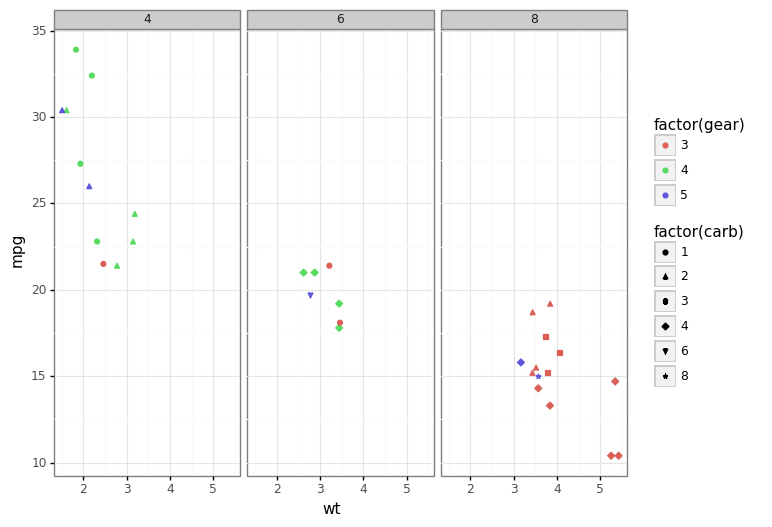

<ggplot: (8757621980957)>

In [19]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)', shape='factor(carb)'))
 + geom_point()
 + facet_wrap('~cyl')
 + theme_bw())

In [ ]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)')
 + geom_point()
 + facet_wrap('~cyl')
 + theme_bw())

# Visualizing 5 variables

In [ ]:
#Scatter plot colored according some variable and smoothed with a linear model with confidence intervals.

In [ ]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm'))

In [14]:
#Scatter plot colored according some variable, 
#smoothed with a linear model with confidence intervals and plotted on separate panels.

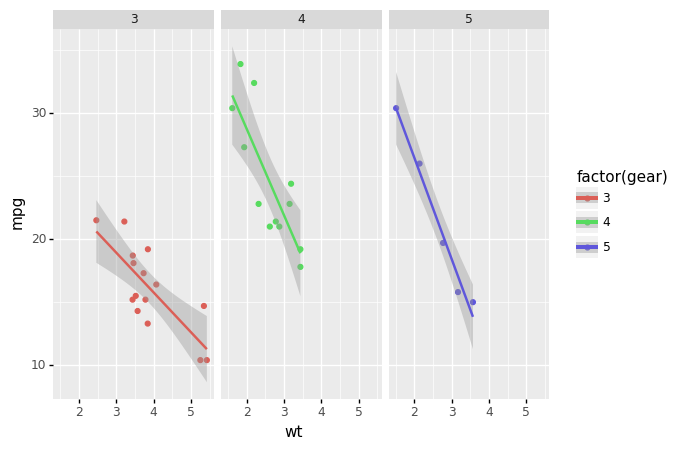

<ggplot: (121602975706)>

In [15]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

In [16]:
#Make it playful

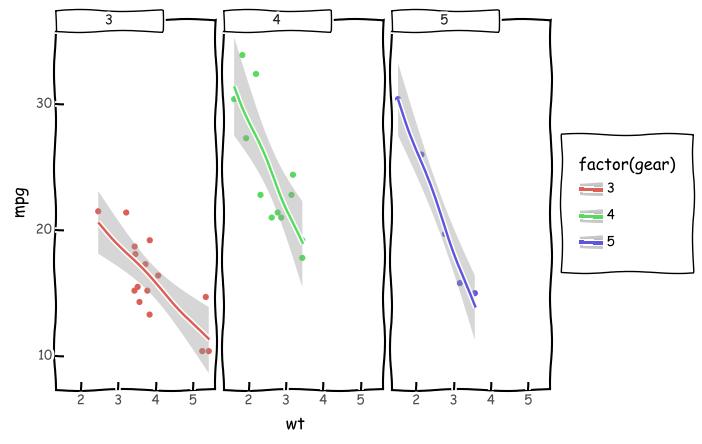

<ggplot: (-9223371915251603105)>

In [17]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear')
 + theme_xkcd())